In [20]:
import tensorflow as tf
import os
from tensorflow import keras
import zipfile
import numpy as np
import shutil
import matplotlib.pyplot as plt
import cv2

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
local_zip= '/content/drive/MyDrive/Uplift Dataset/Cats-vs-Dogs.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
cats_dir= os.path.join('/content/Cats-vs-Dogs/Cat')
dogs_dir= os.path.join('/content/Cats-vs-Dogs/Dog')

In [5]:
print('Total cat images: ',len(os.listdir(cats_dir)))
print('Total dog images: ',len(os.listdir(dogs_dir)))

Total cat images:  12500
Total dog images:  12500


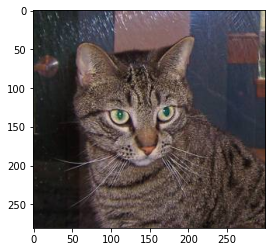

In [21]:
img = cv2.imread(cats_dir + '/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

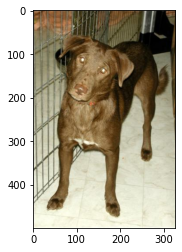

In [22]:
img = cv2.imread(dogs_dir + '/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Model from Scratch

**Image Data Generator**

In [7]:
datagen= ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    rescale= 1./255,
    validation_split=0.01
)
train_gen = datagen.flow_from_directory('/content/Cats-vs-Dogs/',
                                       target_size=(300,300),
                                       batch_size=32,
                                       class_mode='binary',
                                       subset='training')

test_gen = datagen.flow_from_directory('/content/Cats-vs-Dogs/',
                                       target_size=(300,300),
                                       batch_size=32,
                                       class_mode='binary',
                                       subset='validation')

Found 24750 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


**Model Building**

In [12]:
model= keras.Sequential([
    keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 64)       

In [13]:
from tensorflow.keras.optimizers import RMSprop

#compiling the model
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['acc'])

In [14]:
model.fit( train_gen, validation_data= test_gen,
          epochs=5, verbose=2 )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

774/774 - 555s - loss: 0.6198 - acc: 0.6541 - val_loss: 0.4896 - val_acc: 0.7702
Epoch 2/5
774/774 - 558s - loss: 0.4547 - acc: 0.7913 - val_loss: 0.3689 - val_acc: 0.8589
Epoch 3/5
774/774 - 566s - loss: 0.3839 - acc: 0.8320 - val_loss: 0.4048 - val_acc: 0.8024
Epoch 4/5
774/774 - 566s - loss: 0.3299 - acc: 0.8613 - val_loss: 0.3020 - val_acc: 0.8629
Epoch 5/5
774/774 - 561s - loss: 0.3011 - acc: 0.8723 - val_loss: 0.2535 - val_acc: 0.8710


In [15]:
import pandas as pd

data = pd.DataFrame(model.history.history)
data

,loss,acc,val_loss,val_acc
0,0.619787,0.654101,0.489565,0.770161
1,0.454686,0.791313,0.368882,0.858871
2,0.383911,0.832000,0.404763,0.802419
3,0.329904,0.861293,0.301958,0.862903
4,0.301119,0.872323,0.253527,0.870968


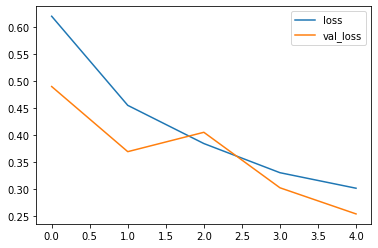

In [18]:
# Loss Plot
data[['loss', 'val_loss']].plot()

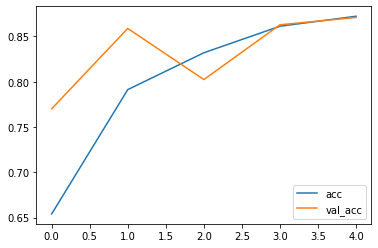

In [19]:
# Accuracy Plot
data[['acc', 'val_acc']].plot()

# Transfer Learning

**Image Data Generator**

In [33]:
datagen= ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    rescale= 1./255,
    validation_split=0.01
)
train_gen = datagen.flow_from_directory('/content/Cats-vs-Dogs/',
                                       target_size=(160, 160),
                                       batch_size=32,
                                       class_mode='binary',
                                       subset='training')

test_gen = datagen.flow_from_directory('/content/Cats-vs-Dogs/',
                                       target_size=(160, 160),
                                       batch_size=32,
                                       class_mode='binary',
                                       subset='validation')

Found 24750 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


**MobileNet V-2**

In [30]:
feature_extraction = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')
feature_extraction.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [26]:
feature_extraction.trainable = False

In [27]:
base_model = keras.Sequential([
                               feature_extraction,
                               keras.layers.Flatten(),
                               keras.layers.Dense(400, activation='relu'),
                               keras.layers.Dense(1, activation='sigmoid')
])

base_model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['acc'])

base_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_3 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 400)               12800400  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 401       
Total params: 15,058,785
Trainable params: 12,800,801
Non-trainable params: 2,257,984
_________________________________________________________________


In [34]:
base_model.fit( train_gen, validation_data= test_gen,
          epochs=5, verbose=2 )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

774/774 - 226s - loss: 0.4225 - acc: 0.9509 - val_loss: 0.1452 - val_acc: 0.9597
Epoch 2/5
774/774 - 224s - loss: 0.1718 - acc: 0.9651 - val_loss: 0.2775 - val_acc: 0.9516
Epoch 3/5
774/774 - 223s - loss: 0.1238 - acc: 0.9724 - val_loss: 0.2847 - val_acc: 0.9637
Epoch 4/5
774/774 - 222s - loss: 0.0959 - acc: 0.9784 - val_loss: 0.3487 - val_acc: 0.9637
Epoch 5/5
774/774 - 221s - loss: 0.0822 - acc: 0.9820 - val_loss: 0.1679 - val_acc: 0.9677


In [35]:
data1 = pd.DataFrame(base_model.history.history)
data1

,loss,acc,val_loss,val_acc
0,0.422524,0.950909,0.145215,0.959677
1,0.171845,0.965091,0.277516,0.951613
2,0.123756,0.972444,0.284744,0.963710
3,0.095929,0.978424,0.348725,0.963710
4,0.082160,0.982020,0.167896,0.967742


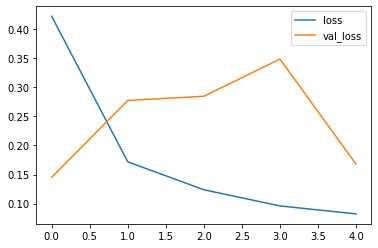

In [36]:
# Loss Plot
data1[['loss', 'val_loss']].plot()

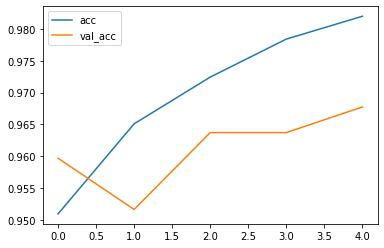

In [37]:
# Accuracy Plot
data1[['acc', 'val_acc']].plot()

In [13]:
# import PIL
# from pathlib import Path
# from PIL import UnidentifiedImageError

# path = Path("/content/Cats-vs-Dogs/Cat").rglob("*.jpg")
# for img_p in path:
#     try:
#         img = PIL.Image.open(img_p)
#     except PIL.UnidentifiedImageError:
#             print(img_p)